In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

1. longitude : mesure de la distance à l'ouest d'une maison ; une valeur plus élevée est plus à l'ouest
2. latitude : mesure de la distance au nord d'une maison ; une valeur plus élevée est plus au nord
3. housingMedianAge : âge médian d'une maison dans un bloc ; un nombre inférieur est un bâtiment plus récent
4. totalRooms : nombre total de chambres dans un bloc
5. totalBedrooms : nombre total de chambres dans un bloc
6. population : nombre total de personnes résidant dans un bloc
7. ménages(households) : nombre total de ménages, un groupe de personnes résidant dans une unité d'habitation, pour un bloc
8. revenu médian : revenu médian des ménages dans un bloc de maisons (mesuré en dizaines de milliers de dollars américains)
9. medianHouseValue : Valeur médiane des maisons pour les ménages d'un bloc (mesurée en dollars américains)
10. oceanProximity : Emplacement de la maison par rapport à l'océan/la mer

c'est un rapport j'ai décidé de le faire:
donc :
1- variable target : median_house_value<br>
2- le nombre de ligne est 20640, et nous avons 10 colonnes)<br>
3- types de variables :float64: 9, object: 1<br>
4- Analyse des valeurs manquantes: nous avons pas bcp de nan donc c'est facile de supprimer ces lignes on va pas perdre bcp d'informations total_bedrooms 207<br>

Analyse de fond:
1-variable target : c'est valeurs de type float  de  500001.0  à 47000.0  en 1990<br>
2-variale quantitative: 
3-variable qualitatives : il y a une seule ocean_proximity elle est pas binaire nous avons :<br>
<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND.<br> 
3- il y a une correlation de 0,68 avec median_income
4-une petite analyse sur la relation entre les variables numériques et la target variable :<br>
-----ça nous a permet de voir pas mal de valeurs abérantes (outliers) qu'on doit traiter apres par exemple :<br>
--------1- households>2500<br>
--------2- total_bedrooms>3000<br>
--------3- populations>8000<br>
--------4- median_income>10.0<br>
--------5- total_rooms>15000<br>
5- nous avons toutes les maisons à coté de l'ocean plus cher que d'autre
6- j'ai testé un model sans faire du reel preprocessing est ça nous donne 0.65260966645311 depuis là on va commencer à améliorer le resultat.

In [2]:
house= pd.read_csv('housing.csv')
print(house.shape)
house

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Prédire le prix de loyer en Californie en 2050

# -1 Exploration de Data housing.csv
 Objectif:
 comprendre du mieux possibvle nos données

In [3]:
house.shape

(20640, 10)

In [4]:
house.dtypes.value_counts()

float64    9
object     1
dtype: int64

In [5]:
house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

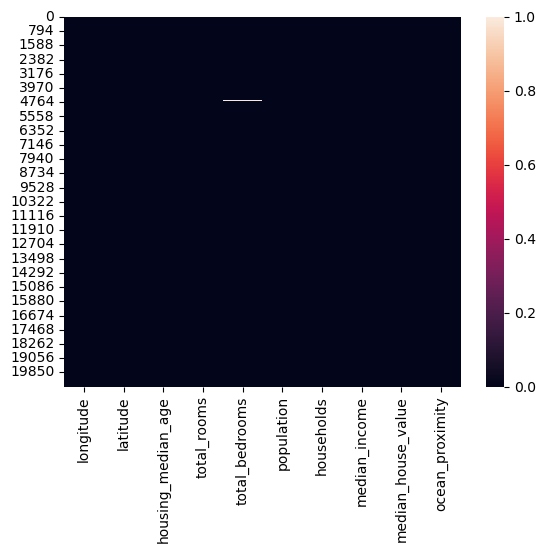

In [6]:
sns.heatmap(house.isna())

In [7]:
house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
house.dropna(inplace=True)

In [9]:
#nous avons un dataframe avec 0 valeurs manquantes 
house.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
#faire une analyse sur notre target value:
house['median_house_value'].value_counts(normalize=True).sort_values(ascending=False)


500001.0    0.046885
137500.0    0.005824
162500.0    0.005677
112500.0    0.005041
187500.0    0.004503
              ...   
291100.0    0.000049
74900.0     0.000049
79100.0     0.000049
41300.0     0.000049
47000.0     0.000049
Name: median_house_value, Length: 3833, dtype: float64

In [11]:
#sns.pairplot(house, hue= "median_house_value")

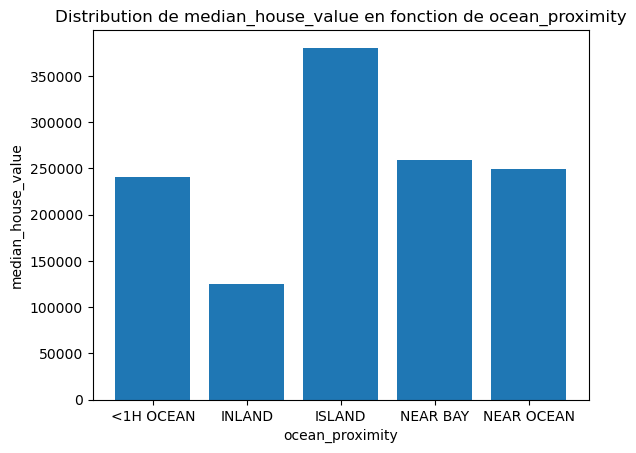

In [12]:
#analyse des variable quantitatives
group = house.groupby('ocean_proximity')['median_house_value'].mean()

# Créer un graphique en barres
plt.bar(group.index, group.values)

# Ajouter des labels et un titre
plt.xlabel('ocean_proximity')
plt.ylabel('median_house_value')
plt.title('Distribution de median_house_value en fonction de ocean_proximity')

# Afficher le graphique
plt.show()

C:\Users\ProBook\AppData\Local\Temp\ipykernel_11952\949924940.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house.corr(),annot=True)


<Axes: >

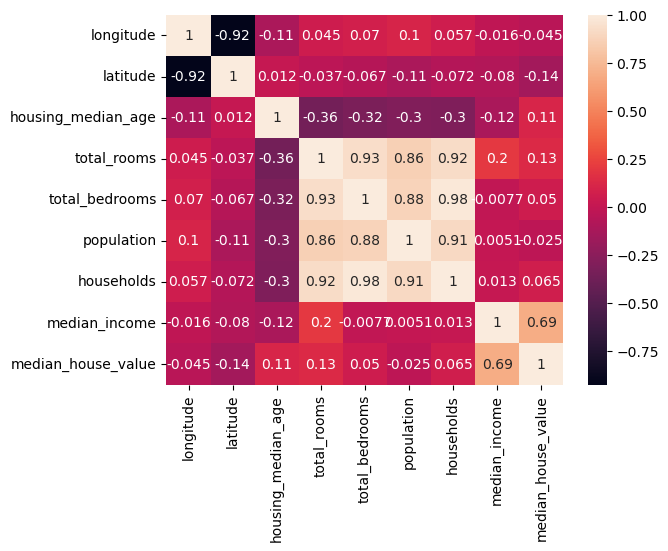

In [13]:
sns.heatmap(house.corr(),annot=True)

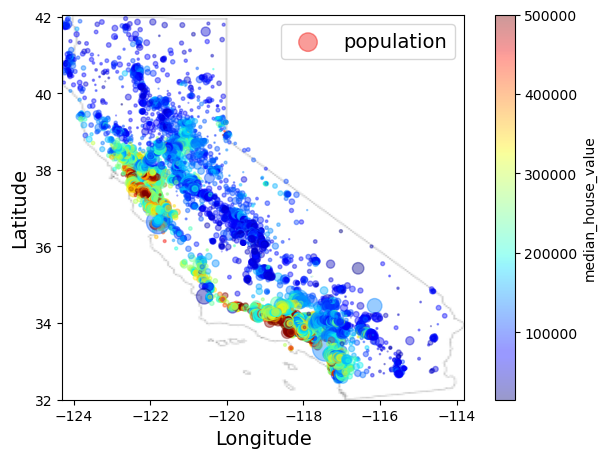

In [14]:
import matplotlib.image as mpimg
ax=house.plot(kind="scatter", x="longitude",y="latitude",alpha=0.4,
             s=house["population"]/100,label="population",figsize=(8,5),
             c="median_house_value",cmap=plt.get_cmap("jet"),sharex=False)
#télécharger l'image
california_image= mpimg.imread("images.png")
plt.imshow(california_image,extent=[-124.3,-113.8,32,42.05],alpha=0.5,cmap=plt.get_cmap("jet"))
plt.xlabel("Longitude",fontsize=14)
plt.ylabel("Latitude",fontsize=14)
plt.legend(fontsize=14)
plt.show()

#  le pré-traitemetement des données


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

In [16]:
trainset, testset =train_test_split(house,test_size=0.3,random_state=0)

In [17]:
#creer les colonnes numérique de catégorielle variable

def encodage(house):
    #encodage en one hot 
    one_hot_en= pd.get_dummies(house['ocean_proximity'])
    #suppression de la derniere colonne
    one_hot_en=one_hot_en.iloc[:, :-1]
    #concaténation des colonnes ajouter                           
    house=pd.concat([house, one_hot_en],axis=1)
    #supprimer la colonne catégorielle
    house=house.drop(['ocean_proximity'],axis=1)
    return house
 

In [18]:
#creer le x, Y
def preprocessing(house):
    if 'ocean_proximity' in house.columns:
        house=encodage(house)
    
    X=house.drop('median_house_value',axis=1)
    Y= house['median_house_value']
    return X,Y

In [19]:
X_train, y_train= preprocessing(trainset)
X_test, y_test=preprocessing(testset)
#X_test, y_test= preprocessing(testset)
model = LinearRegression()


In [20]:
 def evaluation(model):
    model.fit(X_train, y_train)
    ypred=model.predict(X_test)
    
    print(mean_squared_error(y_test, ypred))
    
    N,train_score, val_score= learning_curve(model, X_train, y_train, cv=4,scoring='r2',train_sizes=np.linspace(0.1,1,10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label='train score')
    plt.plot(N,val_score.mean(axis=1),label='validation score')
    plt.legend()
    

4699359207.200249


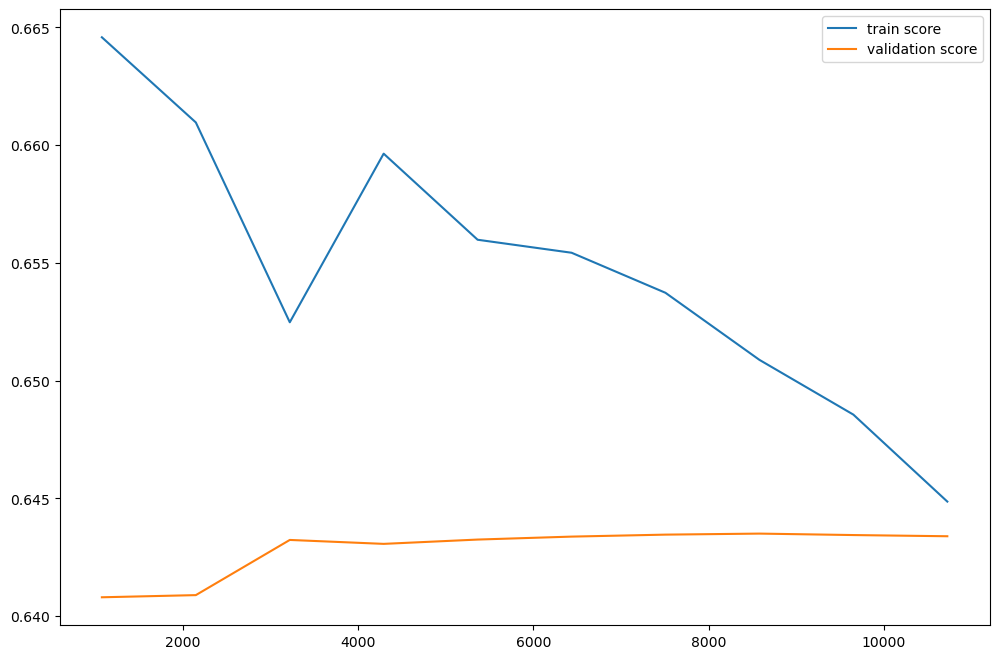

In [21]:
evaluation(model)

In [22]:
print(model.score(X_test, y_test))

0.6495809082844284


# traiter les outliers

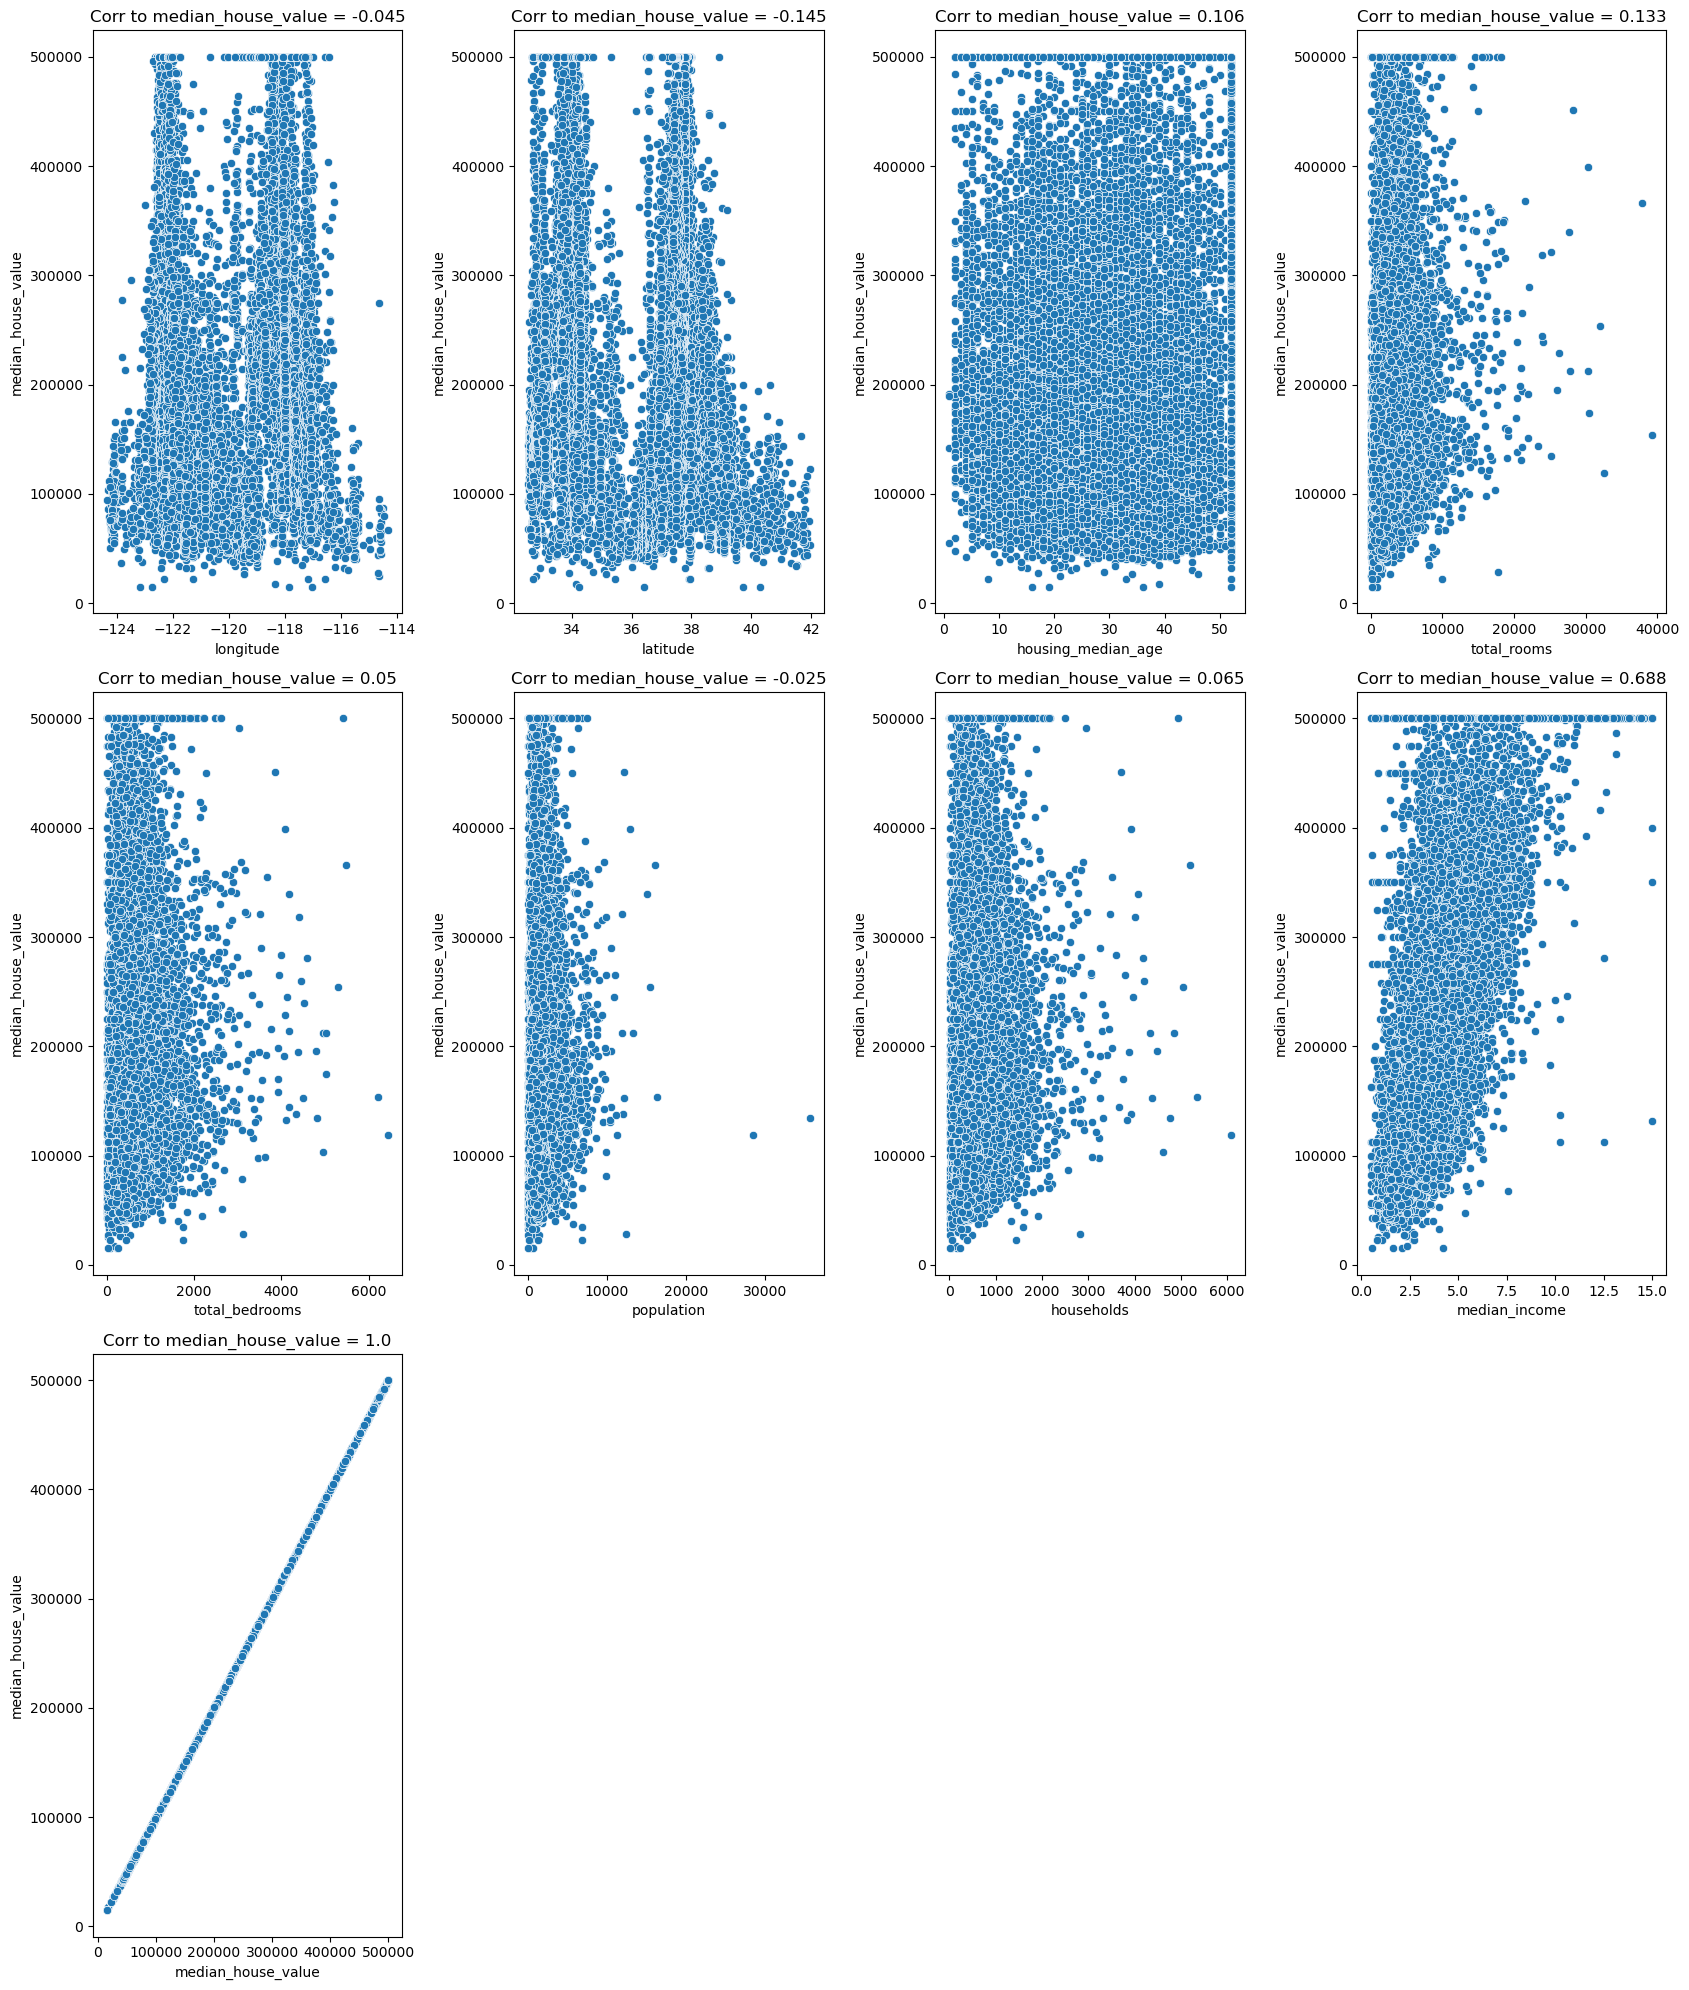

In [23]:
#la relation entre les variable numérique et la target variable 
num_col=house.select_dtypes('float64')
correlation = num_col.corr()
corr_price = correlation[['median_house_value']]

plt.figure(figsize=(17,20))
for i in range(len(num_col.columns)):
    plt.subplot(3,4,i+1)
    sns.scatterplot(x=num_col.iloc[:, i], y='median_house_value', data=num_col.dropna())
    plt.title('Corr to median_house_value = {}'.format(np.around(corr_price.iloc[i, 0], decimals=3)))
plt.tight_layout()
plt.show()

In [24]:
# les colonnes qui a des valeurs aberantes :
col_abes=['households','population','median_income','total_rooms']


In [25]:
def delete_outlayer(df) :
    for col in col_abes :
        # Calculer la moyenne et l'écart-type de la colonne d'intérêt
        mean = df[col].mean()
        std_dev = df[col].std()

        # Définir les seuils d'identification des outliers
        threshold = 6     
        lower_threshold = mean - threshold * std_dev
        upper_threshold = mean + threshold * std_dev

        # Supprimer les outliers
        df = df[(df[col] >= lower_threshold) & (df[col] <= upper_threshold)]

        # Afficher le DataFrame sans outliers
        
    return df

<Axes: xlabel='median_income', ylabel='median_house_value'>

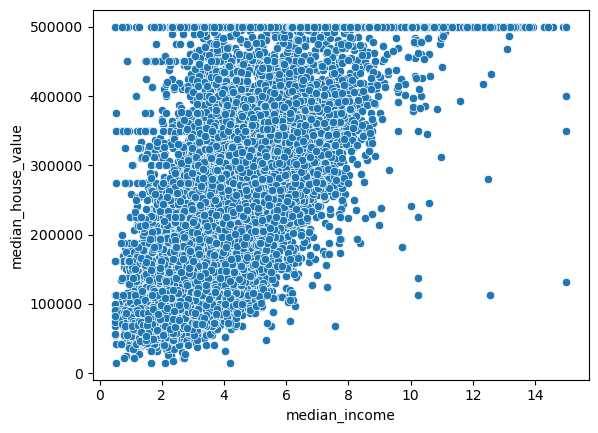

In [26]:
sns.scatterplot(x='median_income', y='median_house_value', data=house.dropna())

(20433, 13)


<Axes: xlabel='median_income', ylabel='median_house_value'>

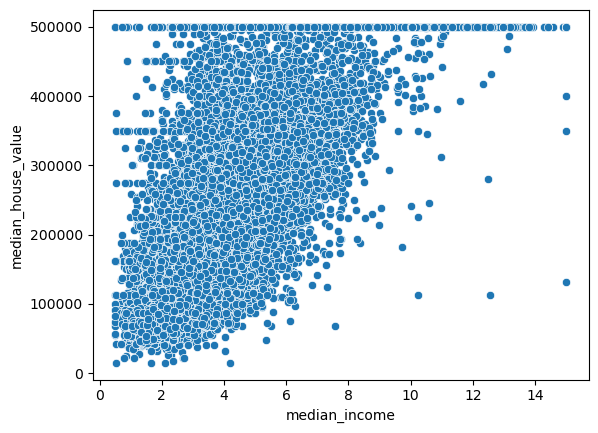

In [27]:
# Appliquer la fonction sur chaque colonne contenant des valeurs aberrantes
#creer une copie de copy dans pour garder nos valeurs originals
copy=house.copy()
copy=encodage(copy)
print(copy.shape)

copy = delete_outlayer(copy)

copy.shape
sns.scatterplot(x='median_income', y='median_house_value', data=copy.dropna())

<Axes: xlabel='longitude', ylabel='median_house_value'>

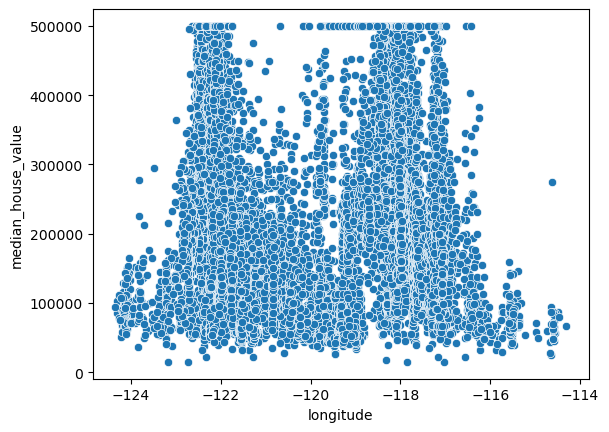

In [28]:
sns.scatterplot(x=num_col.iloc[:, 0], y='median_house_value', data=num_col.dropna())

In [29]:
copy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0


# Features engeniring

In [30]:
#Le nombre de pièces dans un bloc
#n'est pas utile pour la prédiction, nous pouvons donc créer
#un nouvel attribut qui est le nombre de pièces par ménage.
def feature_engineerung(copy):
    copy["rooms_per_household"] = copy["total_rooms"]/copy["households"]
    copy["bedrooms_per_room"] = copy["total_bedrooms"]/copy["total_rooms"]
    copy["population_per_household"] = copy["population"]/copy["households"]
    copy=copy.drop("total_rooms",axis=1)
    copy=copy.drop("total_bedrooms",axis=1)
    copy=copy.drop("population",axis=1)
    return copy
def feature_engineerung_sans_sup(copy):
    copy["rooms_per_household"] = copy["total_rooms"]/copy["households"]
    copy["bedrooms_per_room"] = copy["total_bedrooms"]/copy["total_rooms"]
    copy["population_per_household"] = copy["population"]/copy["households"]
    return copy

In [31]:
copy1 = feature_engineerung_sans_sup(copy)
copy=feature_engineerung(copy)
corr_matrix = copy.corr()
corr_matrix["median_house_value"].sort_values(ascending=False) 

median_house_value          1.000000
median_income               0.688005
<1H OCEAN                   0.257843
NEAR BAY                    0.161153
rooms_per_household         0.150516
housing_median_age          0.110272
households                  0.064717
ISLAND                      0.023628
population_per_household   -0.036009
longitude                  -0.046595
latitude                   -0.143880
bedrooms_per_room          -0.255413
INLAND                     -0.485424
Name: median_house_value, dtype: float64

In [32]:
#la relation entre les variable numérique et la target variable 
col_abes=['rooms_per_household','population_per_household','bedrooms_per_room']
copy1 = delete_outlayer(copy1)
 

In [33]:
copy1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,5.329513,0.219892,2.123209


In [34]:
# Tracer une carte de chaleur de la matrice de corrélation en utilisant la fonction heatmap()
c=copy.corr()
c

,longitude,latitude,housing_median_age,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924495,-0.106462,0.051456,-0.016998,-0.046595,0.321332,-0.055576,0.009572,-0.474629,-0.029339,0.094462,0.016541
latitude,-0.924495,1.000000,0.008843,-0.071892,-0.078664,-0.143880,-0.447383,0.351674,-0.016748,0.358498,0.108181,-0.115269,-0.008327
housing_median_age,-0.106462,0.008843,1.000000,-0.288657,-0.113086,0.110272,0.045578,-0.237940,0.017094,0.257785,-0.149705,0.131280,0.011589
households,0.051456,-0.071892,-0.288657,1.000000,-0.010627,0.064717,0.045934,-0.048992,-0.010126,-0.005850,-0.110082,0.097382,-0.041602
median_income,-0.016998,-0.078664,-0.113086,-0.010627,1.000000,0.688005,0.170012,-0.238984,-0.009253,0.056736,0.323799,-0.615084,-0.001086
median_house_value,-0.046595,-0.143880,0.110272,0.064717,0.688005,1.000000,0.257843,-0.485424,0.023628,0.161153,0.150516,-0.255413,-0.036009
<1H OCEAN,0.321332,-0.447383,0.045578,0.045934,0.170012,0.257843,1.000000,-0.607085,-0.013980,-0.315176,-0.099295,0.077321,0.006768
INLAND,-0.055576,0.351674,-0.237940,-0.048992,-0.238984,-0.485424,-0.607085,1.000000,-0.010708,-0.241413,0.150713,-0.113675,0.011222
ISLAND,0.009572,-0.016748,0.017094,-0.010126,-0.009253,0.023628,-0.013980,-0.010708,1.000000,-0.005559,0.001462,0.016257,-0.001691
NEAR BAY,-0.474629,0.358498,0.257785,-0.005850,0.056736,0.161153,-0.315176,-0.241413,-0.005559,1.000000,-0.029436,0.002103,-0.023677


# Model de Machine Learning

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
trainset, testset =train_test_split(copy1,test_size=0.2,random_state=0)

In [37]:
X_train, y_train= preprocessing(trainset)

X_test, y_test=preprocessing(testset)

# Normaliser les données : 

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape

(16144, 15)

# Sélectionner les caractéristiques pertinentes :

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selector = SelectKBest(f_regression, k=13)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
X_test_selected
# Après l'ajustement du SelectKBest aux données d'entraînement
# Utiliser get_support() pour obtenir un tableau booléen indiquant les colonnes sélectionnées
mask = selector.get_support()

# Afficher les colonnes sélectionnées
features_selected = X_train.columns[mask]
print("Colonnes sélectionnées : ")
print(features_selected)

Colonnes sélectionnées : 
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', '<1H OCEAN', 'INLAND',
       'NEAR BAY', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')


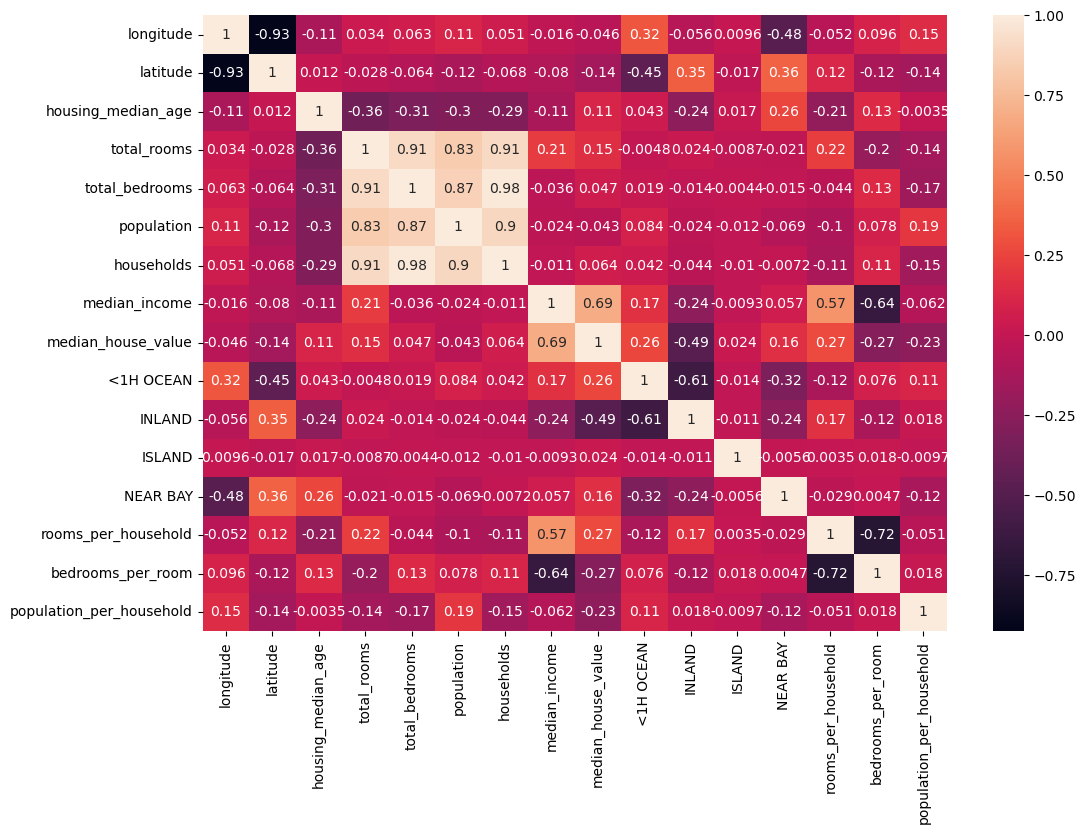

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))

# Tracer une carte de chaleur de la matrice de corrélation en utilisant la fonction heatmap()
sns.heatmap(copy1.corr(), annot=True, ax=ax)

# Afficher la figure
plt.show()

# Choisir le nombre optimal de voisins :

In [41]:
from sklearn.model_selection import cross_val_score
def evaluation1(model):
    model.fit(X_train_selected, y_train)
    ypred = model.predict(X_test_selected)
    scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='r2')
    print('Mean cross-validation R^2 score: ', np.mean(scores))
    print("l'erreur quadratique", mean_squared_error(y_test, ypred) )
    error = ypred - y_test
    variance = np.var(error)
    print('varriance = ', variance)
    print('Test R^2 score: ', model.score(X_test_selected, y_test))
    m = variance >  mean_squared_error(y_test, ypred) 
    print('variance > erreur',m)     

Mean cross-validation R^2 score:  0.7552820586148805
l'erreur quadratique 3297919106.5407314
varriance =  3286492888.9297857
Test R^2 score:  0.7539406989201619
variance > erreur False
Mean cross-validation R^2 score:  0.7546268967395204
l'erreur quadratique 3304375469.329891
varriance =  3292682815.731513
Test R^2 score:  0.7534589866452102
variance > erreur False
Mean cross-validation R^2 score:  0.7541242744869759
l'erreur quadratique 3315456575.537341
varriance =  3303724160.6007795
Test R^2 score:  0.7526322200810489
variance > erreur False
Mean cross-validation R^2 score:  0.753001993755548
l'erreur quadratique 3330484894.8060274
varriance =  3318320103.9635506
Test R^2 score:  0.7515109500873963
variance > erreur False
Mean cross-validation R^2 score:  0.7522655799356482
l'erreur quadratique 3333875655.2973657
varriance =  3321645693.6476645
Test R^2 score:  0.7512579638467778
variance > erreur False
Mean cross-validation R^2 score:  0.7514554253525414
l'erreur quadratique 33438

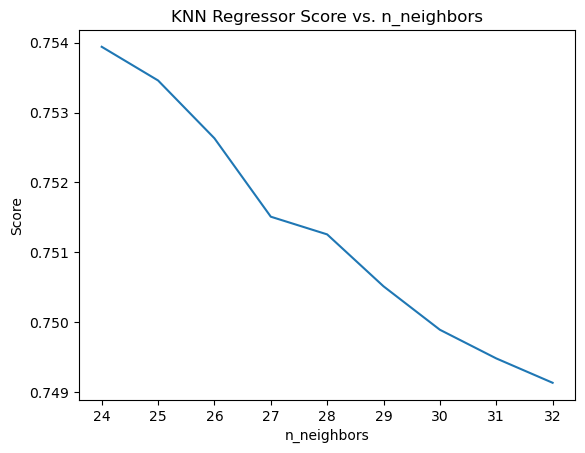

In [42]:
n_values = []
score_values = []
#dis = ['euclidean','manhattan','minkowski','cosine','jaccard','mahalanobis'  ]
for i in range(24,33) :
    knn = KNeighborsRegressor(n_neighbors= i, weights = "distance", metric = 'manhattan')
    evaluation1(knn)
    n_values.append(i)
    score_values.append(knn.score(X_test_selected, y_test))
    #print("score = ",knn.score(X_test, y_test))
plt.plot(n_values, score_values)
plt.title("KNN Regressor Score vs. n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.show()

In [43]:
y_test

4974     112500.0
15991    357000.0
3673     165200.0
16346    133500.0
17577    280500.0
           ...   
14297    139100.0
11516    500001.0
17717    500001.0
4940     100000.0
8060     158200.0
Name: median_house_value, Length: 4037, dtype: float64

In [44]:
 def evaluation2(model):
    model.fit(X_train_selected, y_train)

    ypred=model.predict(X_test_selected)
    
    scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='r2')
    print('Mean cross-validation R^2 score: ', np.mean(scores))
    print('Test R^2 score: ', model.score(X_test_selected,y_test))
   
    
    print(mean_squared_error(y_test, ypred))
    
    N,train_score, val_score= learning_curve(model, X_train_selected, y_train, cv=4,scoring='r2',train_sizes=np.linspace(0.1,1,10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label='train score')
    plt.plot(N,val_score.mean(axis=1),label='validation score')
    plt.legend()
    df_ypred = pd.DataFrame(ypred, columns=['Prix_predits'])
    df_ytest = y_test.reset_index(drop=True)
    df_resultat = pd.concat([df_ypred, df_ytest], axis=1)
    return  df_resultat
     

Mean cross-validation R^2 score:  0.760267890846646
Test R^2 score:  0.7629760184612282
3176819222.011209


,Prix_predits,median_house_value
0,132640.373117,112500.0
1,342362.974723,357000.0
2,177286.908556,165200.0
3,203244.371193,133500.0
4,267927.603171,280500.0
...,...,...
4032,115252.137998,139100.0
4033,333049.549166,500001.0
4034,394586.605073,500001.0
4035,130982.641834,100000.0


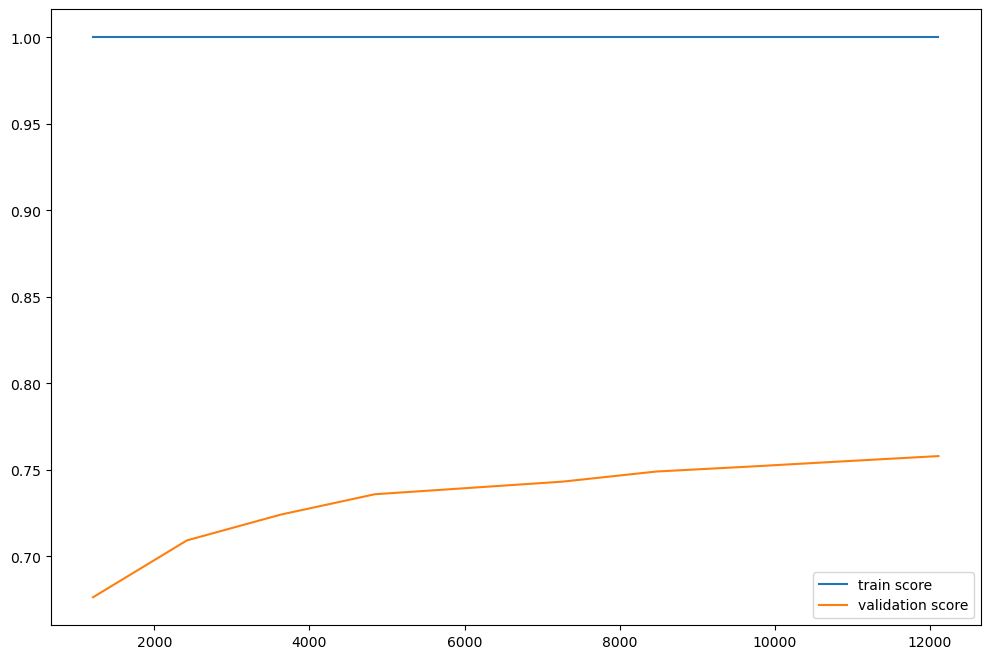

In [45]:
n_values = []
score_values = []
#dis = ['euclidean','manhattan','minkowski','cosine','jaccard','mahalanobis'  ]

#knn = KNeighborsRegressor(n_neighbors=13, weights = "uniform", metric ='cosine')
knn=KNeighborsRegressor(algorithm= 'auto', metric= 'manhattan', n_neighbors= 9, weights= 'distance')
b=evaluation2(knn)
b


In [46]:
print(knn.score(X_test_selected, y_test))

0.7629760184612282


Mean cross-validation R^2 score:  0.7450760876970175
l'erreur quadratique 3367513145.105317
varriance =  3360365255.2593246
Test R^2 score:  0.7487482548560965
variance > erreur False
Mean cross-validation R^2 score:  0.7470978093266682
l'erreur quadratique 3344071840.2028117
varriance =  3336617810.346475
Test R^2 score:  0.7504972216786212
variance > erreur False
Mean cross-validation R^2 score:  0.7486098863631765
l'erreur quadratique 3297008679.3266454
varriance =  3289307283.080599
Test R^2 score:  0.7540086263243053
variance > erreur False
Mean cross-validation R^2 score:  0.7489679756493539
l'erreur quadratique 3296400687.105405
varriance =  3287792289.4472775
Test R^2 score:  0.7540539889108901
variance > erreur False
Mean cross-validation R^2 score:  0.7495373758120989
l'erreur quadratique 3283082175.0541573
varriance =  3274816780.62753
Test R^2 score:  0.7550476893810606
variance > erreur False
Mean cross-validation R^2 score:  0.7493442630150472
l'erreur quadratique 3285094

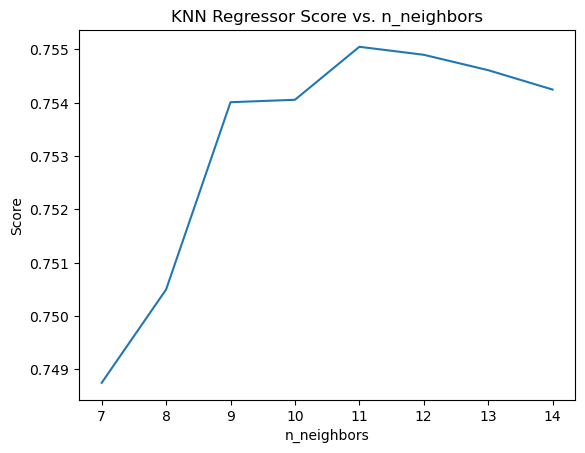

Mean cross-validation R^2 score:  0.7582282936146253
l'erreur quadratique 3191583225.4607506
varriance =  3182328169.276462
Test R^2 score:  0.761874469195593
variance > erreur False
Mean cross-validation R^2 score:  0.7598281992158231
l'erreur quadratique 3192712181.907882
varriance =  3182487741.6422725
Test R^2 score:  0.7617902372222314
variance > erreur False
Mean cross-validation R^2 score:  0.760267890846646
l'erreur quadratique 3176819222.011209
varriance =  3166247426.907728
Test R^2 score:  0.7629760184612282
variance > erreur False
Mean cross-validation R^2 score:  0.7609110292940462
l'erreur quadratique 3191791524.1138387
varriance =  3181355502.426838
Test R^2 score:  0.7618589279347739
variance > erreur False
Mean cross-validation R^2 score:  0.7608501410819495
l'erreur quadratique 3203226330.9992566
varriance =  3192953750.6506653
Test R^2 score:  0.761005771596091
variance > erreur False
Mean cross-validation R^2 score:  0.7605801999029398
l'erreur quadratique 320518849

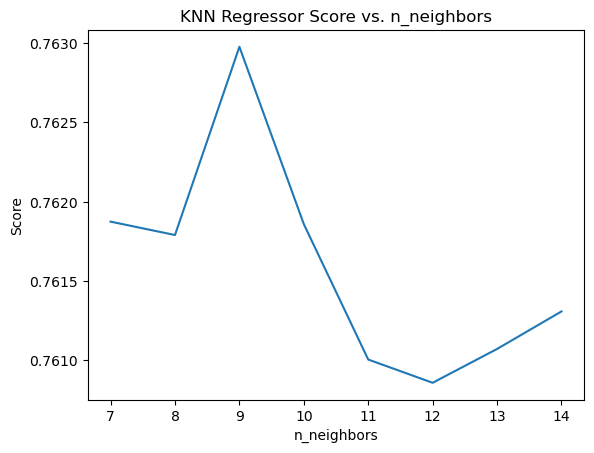

Mean cross-validation R^2 score:  0.7450760876970175
l'erreur quadratique 3367513145.105317
varriance =  3360365255.2593246
Test R^2 score:  0.7487482548560965
variance > erreur False
Mean cross-validation R^2 score:  0.7470978093266682
l'erreur quadratique 3344071840.2028117
varriance =  3336617810.346475
Test R^2 score:  0.7504972216786212
variance > erreur False
Mean cross-validation R^2 score:  0.7486098863631765
l'erreur quadratique 3297008679.3266454
varriance =  3289307283.080599
Test R^2 score:  0.7540086263243053
variance > erreur False
Mean cross-validation R^2 score:  0.7489679756493539
l'erreur quadratique 3296400687.105405
varriance =  3287792289.4472775
Test R^2 score:  0.7540539889108901
variance > erreur False
Mean cross-validation R^2 score:  0.7495373758120989
l'erreur quadratique 3283082175.0541573
varriance =  3274816780.62753
Test R^2 score:  0.7550476893810606
variance > erreur False
Mean cross-validation R^2 score:  0.7493442630150472
l'erreur quadratique 3285094

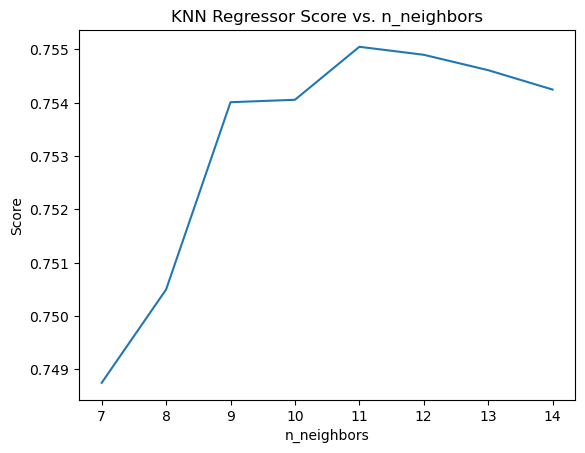

Mean cross-validation R^2 score:  0.7472104458082702
l'erreur quadratique 3367358840.5239534
varriance =  3361490136.720555
Test R^2 score:  0.7487597675937403
variance > erreur False
Mean cross-validation R^2 score:  0.7500800082937253
l'erreur quadratique 3315198557.2350626
varriance =  3309157134.6324086
Test R^2 score:  0.7526514709483605
variance > erreur False
Mean cross-validation R^2 score:  0.7513707880392797
l'erreur quadratique 3291442464.0006995
varriance =  3285326721.1748147
Test R^2 score:  0.7544239242768978
variance > erreur False
Mean cross-validation R^2 score:  0.752483506306216
l'erreur quadratique 3267207871.163111
varriance =  3261309998.7274213
Test R^2 score:  0.7562320786866723
variance > erreur False
Mean cross-validation R^2 score:  0.7532896011521568
l'erreur quadratique 3268824343.384004
varriance =  3262516518.2801623
Test R^2 score:  0.7561114729313344
variance > erreur False
Mean cross-validation R^2 score:  0.7538780938896067
l'erreur quadratique 32536

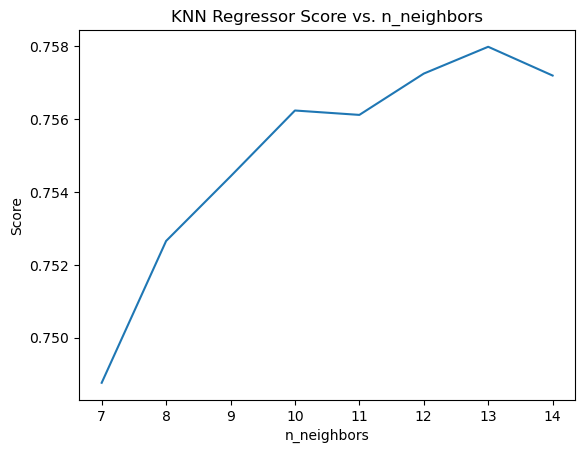

0.7629760184612282
9
manhattan


In [47]:
n_values = []
score_values = []
dis = ['euclidean','manhattan','minkowski','cosine']
max=0
a=75
b='euclidean'
for d in dis :
    for i in range(7,15) :
        
        knn = KNeighborsRegressor(n_neighbors= i, weights = "distance", metric = d)
        evaluation1(knn)
        n_values.append(i)
        score_values.append(knn.score(X_test_selected, y_test))
        if knn.score(X_test_selected, y_test)>max:
            max=knn.score(X_test_selected, y_test)
            a=i
            b=d
        #print("score = ",knn.score(X_test, y_test))
        
    print(d)
    plt.plot(n_values, score_values)
    plt.title("KNN Regressor Score vs. n_neighbors")
    plt.xlabel("n_neighbors")
    plt.ylabel("Score")
    plt.show()
    n_values = []
    score_values = []
print(max)
print(a)
print(b)
       

In [48]:
 def evaluation3(model):
    model.fit(X_train_scaled, y_train)
    ypred=model.predict(X_test_scaled)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    print('Mean cross-validation R^2 score: ', np.mean(scores))
    print('Test R^2 score: ', model.score(X_test_scaled,y_test)) 
    error = ypred - y_test
    variance = np.var(error)
    print('varriance = ', variance)
    m = variance >  mean_squared_error(y_test, ypred) 
    print('variance > erreur',m)   
 

Mean cross-validation R^2 score:  0.7431758966958351
Test R^2 score:  0.7441918160680988
varriance =  3420303443.5462456
variance > erreur False
Mean cross-validation R^2 score:  0.7449943379865896
Test R^2 score:  0.7473283228289889
varriance =  3378461914.820126
variance > erreur False
Mean cross-validation R^2 score:  0.7459570566097089
Test R^2 score:  0.7486177885415568
varriance =  3361043463.8624363
variance > erreur False
Mean cross-validation R^2 score:  0.7464252083181784
Test R^2 score:  0.7488908717844645
varriance =  3357590077.464993
variance > erreur False
Mean cross-validation R^2 score:  0.7467560406825229
Test R^2 score:  0.7492138489472963
varriance =  3352563921.0172877
variance > erreur False
Mean cross-validation R^2 score:  0.7468361038340852
Test R^2 score:  0.7494439740764768
varriance =  3348799233.9702487
variance > erreur False
Mean cross-validation R^2 score:  0.74705002472668
Test R^2 score:  0.7502222790989647
varriance =  3338238618.448239
variance > err

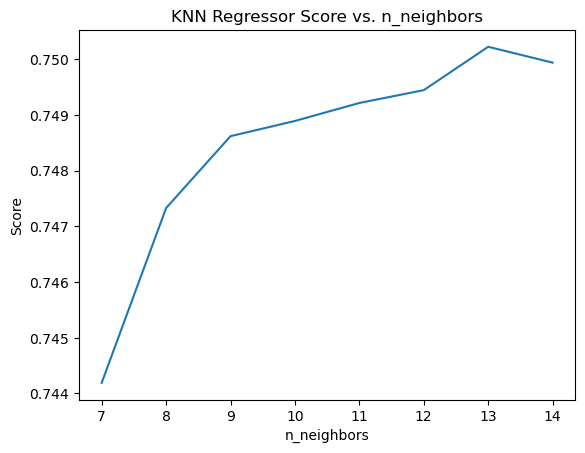

Mean cross-validation R^2 score:  0.7526601892141707
Test R^2 score:  0.7522492775535062
varriance =  3310888713.444873
variance > erreur False
Mean cross-validation R^2 score:  0.7535050498076314
Test R^2 score:  0.7545933590926646
varriance =  3280710751.0305634
variance > erreur False
Mean cross-validation R^2 score:  0.7543164701752235
Test R^2 score:  0.7550612020844033
varriance =  3273314492.8036294
variance > erreur False
Mean cross-validation R^2 score:  0.7547909861648108
Test R^2 score:  0.7556728538124793
varriance =  3264769155.503719
variance > erreur False
Mean cross-validation R^2 score:  0.7552384634570113
Test R^2 score:  0.7554374140835338
varriance =  3268037849.265964
variance > erreur False
Mean cross-validation R^2 score:  0.7548988261280047
Test R^2 score:  0.754962565950623
varriance =  3274373176.2696047
variance > erreur False
Mean cross-validation R^2 score:  0.7549401043962151
Test R^2 score:  0.7549126196258339
varriance =  3274910566.036154
variance > err

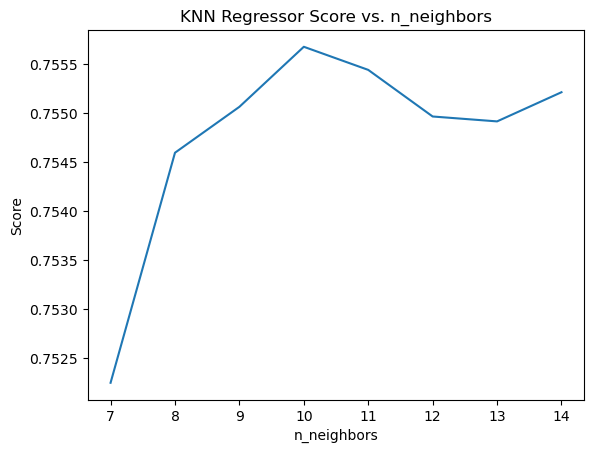

Mean cross-validation R^2 score:  0.7431758966958351
Test R^2 score:  0.7441918160680988
varriance =  3420303443.5462456
variance > erreur False
Mean cross-validation R^2 score:  0.7449943379865896
Test R^2 score:  0.7473283228289889
varriance =  3378461914.820126
variance > erreur False
Mean cross-validation R^2 score:  0.7459570566097089
Test R^2 score:  0.7486177885415568
varriance =  3361043463.8624363
variance > erreur False
Mean cross-validation R^2 score:  0.7464252083181784
Test R^2 score:  0.7488908717844645
varriance =  3357590077.464993
variance > erreur False
Mean cross-validation R^2 score:  0.7467560406825229
Test R^2 score:  0.7492138489472963
varriance =  3352563921.0172877
variance > erreur False
Mean cross-validation R^2 score:  0.7468361038340852
Test R^2 score:  0.7494439740764768
varriance =  3348799233.9702487
variance > erreur False
Mean cross-validation R^2 score:  0.74705002472668
Test R^2 score:  0.7502222790989647
varriance =  3338238618.448239
variance > err

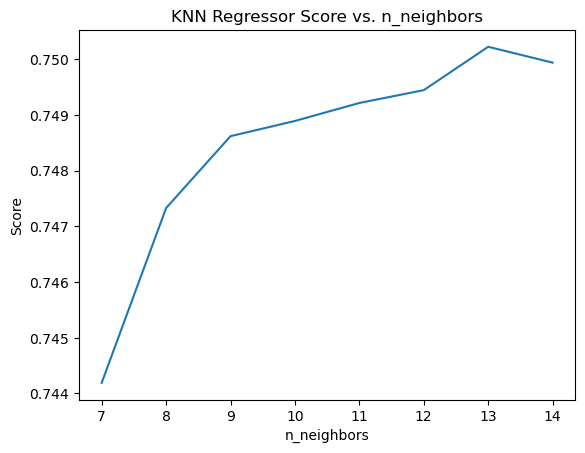

Mean cross-validation R^2 score:  0.7456892493643055
Test R^2 score:  0.7477387806076615
varriance =  3375432654.764078
variance > erreur False
Mean cross-validation R^2 score:  0.7486160403782222
Test R^2 score:  0.750454935230251
varriance =  3339066860.2682967
variance > erreur False
Mean cross-validation R^2 score:  0.749862528041311
Test R^2 score:  0.752064712068947
varriance =  3317145714.540346
variance > erreur False
Mean cross-validation R^2 score:  0.7506335893799237
Test R^2 score:  0.7536620745363439
varriance =  3295451536.223392
variance > erreur False
Mean cross-validation R^2 score:  0.7520191036962692
Test R^2 score:  0.7543277160939624
varriance =  3286411812.143753
variance > erreur False
Mean cross-validation R^2 score:  0.7524268689630841
Test R^2 score:  0.7551513945360613
varriance =  3274574401.3877025
variance > erreur False
Mean cross-validation R^2 score:  0.7523750273562191
Test R^2 score:  0.7553515908179829
varriance =  3271956148.2707686
variance > erreu

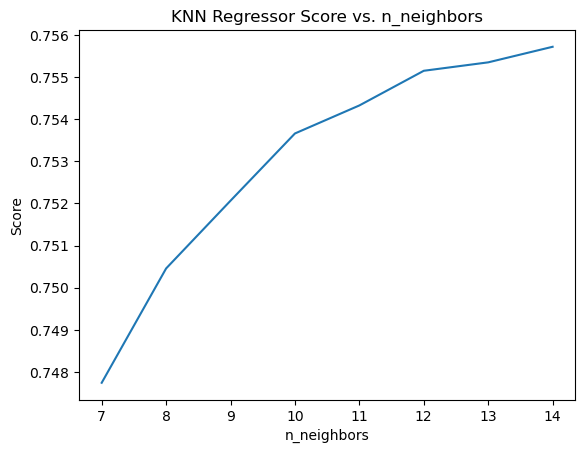

0.7557215640426406
14
cosine


In [49]:
n_values = []
score_values = []
score_values_knn = []

dis = ['euclidean','manhattan','minkowski','cosine']
max=0
a=75
b='euclidean'
for d in dis :
    for i in range(7,15) :
        knn = KNeighborsRegressor(n_neighbors= i, weights = "distance", metric = d)
        evaluation3(knn)
        n_values.append(i)
        score_values.append(knn.score(X_test_scaled, y_test))
        score_values_knn.append(knn.score(X_test_scaled, y_test))
        if knn.score(X_test_scaled, y_test)>max:
            max=knn.score(X_test_scaled, y_test)
            a=i
            b=d
                    
    print(d)
    plt.plot(n_values, score_values)
    plt.title("KNN Regressor Score vs. n_neighbors")
    plt.xlabel("n_neighbors")
    plt.ylabel("Score")
    plt.show()
    n_values = []
    score_values = []
score_values_knn=np.array(score_values_knn)
print(max)
print(a)
print(b)
    

In [50]:
 def evaluation4(model):
    model.fit(X_train_scaled, y_train)

    ypred=model.predict(X_test_scaled)
    
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    print('Mean cross-validation R^2 score: ', np.mean(scores))
    print('Test R^2 score: ', model.score(X_test_scaled,y_test)) 

    
    print(mean_squared_error(y_test, ypred))
    
    N,train_score, val_score= learning_curve(model, X_train_scaled, y_train, cv=4,scoring='r2',train_sizes=np.linspace(0.1,1,10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label='train score')
    plt.plot(N,val_score.mean(axis=1),label='validation score')
    plt.legend()
    df_ypred = pd.DataFrame(ypred, columns=['Prix_predits'])
    df_ytest = y_test.reset_index(drop=True)
    df_resultat = pd.concat([df_ypred, df_ytest], axis=1)
    return  df_resultat
     

Mean cross-validation R^2 score:  0.7543164701752235
Test R^2 score:  0.7550612020844033
3282901065.0439296


,Prix_predits,median_house_value
0,138973.444157,112500.0
1,311901.774850,357000.0
2,196131.580816,165200.0
3,203689.953791,133500.0
4,268023.123624,280500.0
...,...,...
4032,116947.817239,139100.0
4033,328610.976687,500001.0
4034,391580.041031,500001.0
4035,126386.289106,100000.0


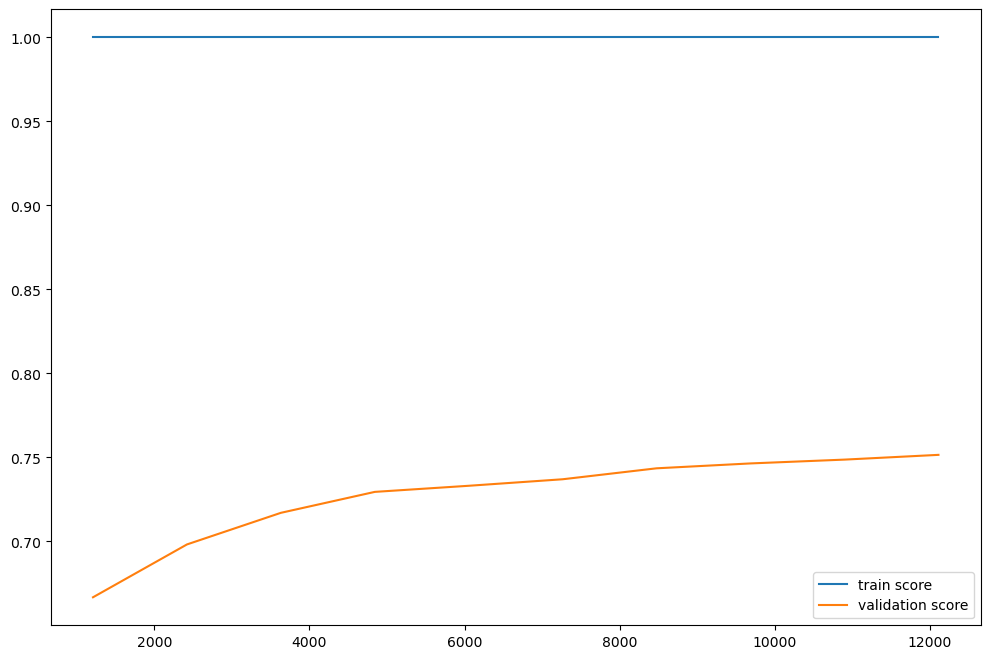

In [51]:
knn=KNeighborsRegressor(algorithm= 'auto', metric= 'manhattan', n_neighbors= 9, weights= 'distance')
b=evaluation4(knn)
b

In [52]:
# regression tree

Mean cross-validation R^2 score:  0.3129390768498456
l'erreur quadratique 9455663305.215918
varriance =  9455552334.696142
Test R^2 score:  0.2945084979454864
variance > erreur False
Mean cross-validation R^2 score:  0.49402765406911164
l'erreur quadratique 6977776347.325633
varriance =  6977000202.400766
Test R^2 score:  0.4793848133784826
variance > erreur False
Mean cross-validation R^2 score:  0.5771634321761001
l'erreur quadratique 5741317911.240662
varriance =  5741259550.790005
Test R^2 score:  0.5716375608743012
variance > erreur False
Mean cross-validation R^2 score:  0.6331629801185062
l'erreur quadratique 4946699601.453002
varriance =  4946605012.4764185
Test R^2 score:  0.6309244080088517
variance > erreur False
Mean cross-validation R^2 score:  0.663060007542102
l'erreur quadratique 4585341691.273195
varriance =  4585131320.582325
Test R^2 score:  0.6578854922398654
variance > erreur False
Mean cross-validation R^2 score:  0.6898609478225813
l'erreur quadratique 4194364963

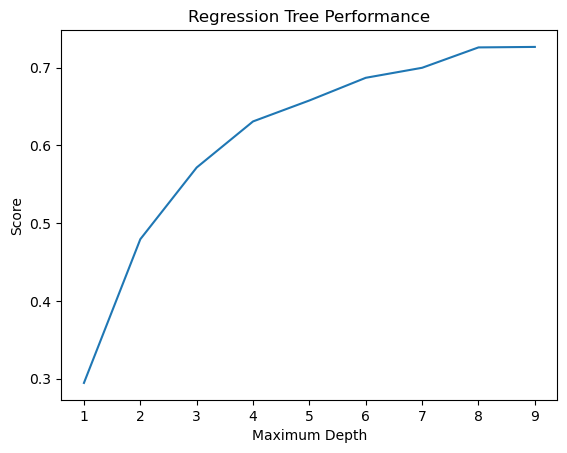

In [53]:
# Define the maximum depths to try
max_depths = range(1,10)
# Train a regression tree for each max depth and record the R-squared score
score_values = []
for max_depth in max_depths:
    reg_tree = DecisionTreeRegressor(max_depth=max_depth)
    evaluation1(reg_tree)
    score_values.append(reg_tree.score(X_test_selected, y_test))
plt.plot(max_depths, score_values)
plt.title('Regression Tree Performance')
plt.xlabel('Maximum Depth')
plt.ylabel("Score")
plt.show()

In [54]:
y_test

4974     112500.0
15991    357000.0
3673     165200.0
16346    133500.0
17577    280500.0
           ...   
14297    139100.0
11516    500001.0
17717    500001.0
4940     100000.0
8060     158200.0
Name: median_house_value, Length: 4037, dtype: float64

Mean cross-validation R^2 score:  0.7129947136596326
Test R^2 score:  0.7217923426756698
3728801734.579196


,Prix_predits,median_house_value
0,161695.000000,112500.0
1,301068.367347,357000.0
2,188191.776316,165200.0
3,169450.934579,133500.0
4,223102.728883,280500.0
...,...,...
4032,123823.050847,139100.0
4033,282735.714286,500001.0
4034,413825.115385,500001.0
4035,144484.000000,100000.0


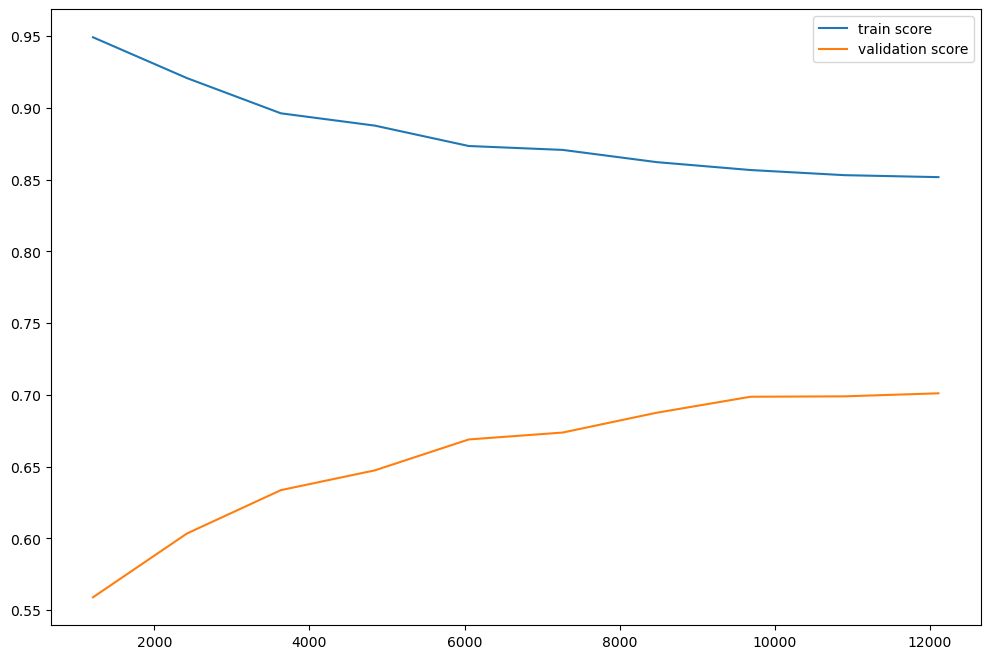

In [55]:
reg_tree = DecisionTreeRegressor(max_depth=10)
b=evaluation2(reg_tree)
b


In [56]:
print(reg_tree.score(X_test_selected, y_test))

0.7217923426756698


Mean cross-validation R^2 score:  0.6177641658157854
l'erreur quadratique 4890262915.672281
varriance =  4885933705.129275
Test R^2 score:  0.6351351757717496
variance > erreur False
Mean cross-validation R^2 score:  0.6251498522196183
l'erreur quadratique 4765317341.891751
varriance =  4760051939.241413
Test R^2 score:  0.6444574240029091
variance > erreur False
Mean cross-validation R^2 score:  0.6311406120747713
l'erreur quadratique 4679181639.98273
varriance =  4676302377.707165
Test R^2 score:  0.6508840493763819
variance > erreur False
Mean cross-validation R^2 score:  0.6400223688438941
l'erreur quadratique 4556980373.798636
varriance =  4550074622.860649
Test R^2 score:  0.6600015435225222
variance > erreur False
Mean cross-validation R^2 score:  0.646743667435077
l'erreur quadratique 4551267387.252249
varriance =  4544442542.035269
Test R^2 score:  0.6604277921451444
variance > erreur False
Mean cross-validation R^2 score:  0.6566800081822095
l'erreur quadratique 4325193900.62

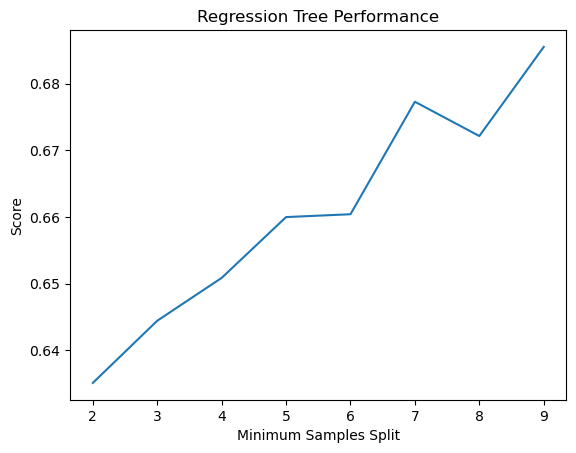

In [57]:

# Define the min_samples_split values to try
min_samples_splits = range(2, 10)
score_values = []
for min_samples_split in min_samples_splits:
    reg_tree = DecisionTreeRegressor(min_samples_split=min_samples_split)
    evaluation1(reg_tree)
    score_values.append(reg_tree.score(X_test_selected, y_test))

# Plot the R-squared scores as a line graph
plt.plot(min_samples_splits, score_values)
plt.xlabel('Minimum Samples Split')
plt.ylabel('Score')
plt.title('Regression Tree Performance')
plt.show()

Mean cross-validation R^2 score:  0.730147849498153
Test R^2 score:  0.7442395357176691
3427943256.575971


,Prix_predits,median_house_value
0,167883.887097,112500.0
1,294596.296296,357000.0
2,196277.419355,165200.0
3,175882.653061,133500.0
4,229652.427184,280500.0
...,...,...
4032,138500.000000,139100.0
4033,293264.207547,500001.0
4034,431054.153846,500001.0
4035,146147.524752,100000.0


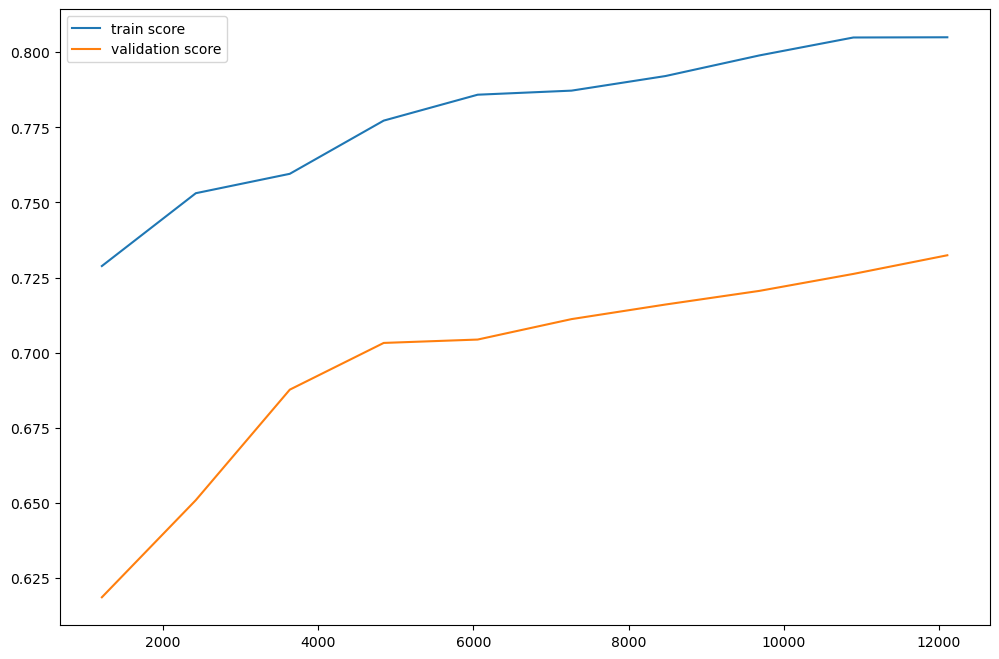

In [59]:
reg_tree = DecisionTreeRegressor(min_samples_split=110)
b=evaluation2(reg_tree)
b

In [60]:
print(reg_tree.score(X_test_selected, y_test))

0.7442395357176691


In [61]:
 def evaluation3(model):
    model.fit(X_train_scaled, y_train)
    ypred=model.predict(X_test_scaled)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    print('Mean cross-validation R^2 score: ', np.mean(scores))
    print('Test R^2 score: ', model.score(X_test_scaled,y_test)) 
    error = ypred - y_test
    variance = np.var(error)
    print('varriance = ', variance)
    m = variance >  mean_squared_error(y_test, ypred) 
    print('variance > erreur',m)   
 

Mean cross-validation R^2 score:  0.3129390768498456
Test R^2 score:  0.2945084979454864
varriance =  9455552334.696142
variance > erreur False
Mean cross-validation R^2 score:  0.3129390768498456
Test R^2 score:  0.2945084979454864
varriance =  9455552334.696142
variance > erreur False
Mean cross-validation R^2 score:  0.3129390768498456
Test R^2 score:  0.2945084979454864
varriance =  9455552334.696142
variance > erreur False
Mean cross-validation R^2 score:  0.3129390768498456
Test R^2 score:  0.2945084979454864
varriance =  9455552334.696142
variance > erreur False
Mean cross-validation R^2 score:  0.3129390768498456
Test R^2 score:  0.2945084979454864
varriance =  9455552334.696142
variance > erreur False
Mean cross-validation R^2 score:  0.3129390768498456
Test R^2 score:  0.2945084979454864
varriance =  9455552334.696142
variance > erreur False
Mean cross-validation R^2 score:  0.3129390768498456
Test R^2 score:  0.2945084979454864
varriance =  9455552334.696142
variance > erreu

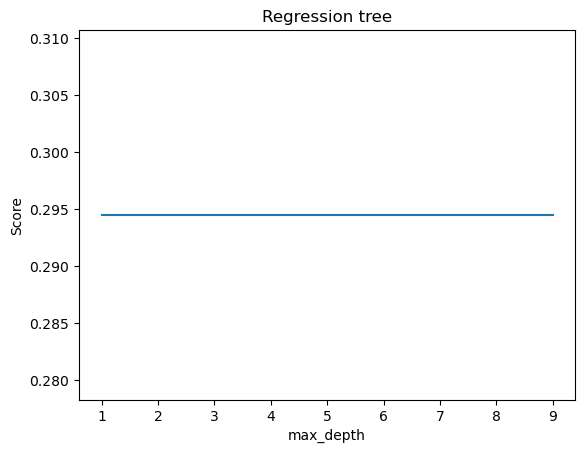

Mean cross-validation R^2 score:  0.49402765406911164
Test R^2 score:  0.4793848133784826
varriance =  6977000202.400766
variance > erreur False
Mean cross-validation R^2 score:  0.49402765406911164
Test R^2 score:  0.4793848133784826
varriance =  6977000202.400766
variance > erreur False
Mean cross-validation R^2 score:  0.49402765406911164
Test R^2 score:  0.4793848133784826
varriance =  6977000202.400766
variance > erreur False
Mean cross-validation R^2 score:  0.49402765406911164
Test R^2 score:  0.4793848133784826
varriance =  6977000202.400766
variance > erreur False
Mean cross-validation R^2 score:  0.49402765406911164
Test R^2 score:  0.4793848133784826
varriance =  6977000202.400766
variance > erreur False
Mean cross-validation R^2 score:  0.49402765406911164
Test R^2 score:  0.4793848133784826
varriance =  6977000202.400766
variance > erreur False
Mean cross-validation R^2 score:  0.49402765406911164
Test R^2 score:  0.4793848133784826
varriance =  6977000202.400766
variance 

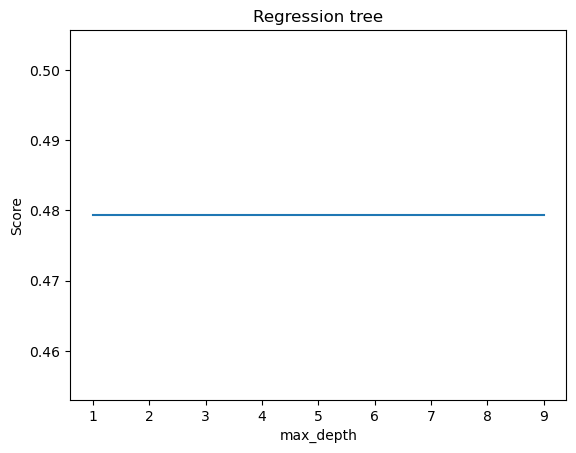

Mean cross-validation R^2 score:  0.5771634321761001
Test R^2 score:  0.5716375608743012
varriance =  5741259550.790005
variance > erreur False
Mean cross-validation R^2 score:  0.5771634321761001
Test R^2 score:  0.5716375608743012
varriance =  5741259550.790005
variance > erreur False
Mean cross-validation R^2 score:  0.5771634321761001
Test R^2 score:  0.5716375608743012
varriance =  5741259550.790005
variance > erreur False
Mean cross-validation R^2 score:  0.5771634321761001
Test R^2 score:  0.5716375608743012
varriance =  5741259550.790005
variance > erreur False
Mean cross-validation R^2 score:  0.5771634321761001
Test R^2 score:  0.5716375608743012
varriance =  5741259550.790005
variance > erreur False
Mean cross-validation R^2 score:  0.5771634321761001
Test R^2 score:  0.5716375608743012
varriance =  5741259550.790005
variance > erreur False
Mean cross-validation R^2 score:  0.5771634321761001
Test R^2 score:  0.5716375608743012
varriance =  5741259550.790005
variance > erreu

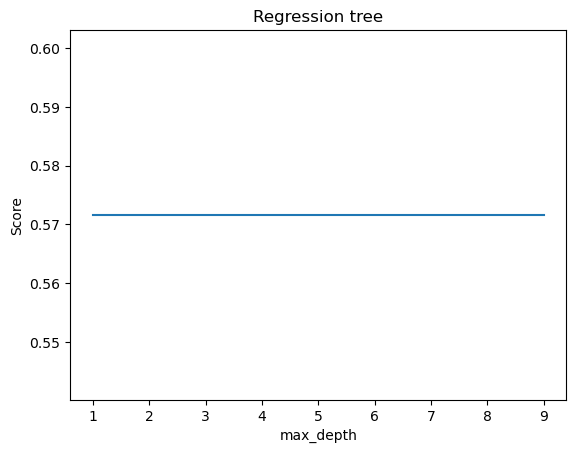

Mean cross-validation R^2 score:  0.6331629801185062
Test R^2 score:  0.6309244080088517
varriance =  4946605012.4764185
variance > erreur False
Mean cross-validation R^2 score:  0.6331629801185062
Test R^2 score:  0.6309244080088517
varriance =  4946605012.4764185
variance > erreur False
Mean cross-validation R^2 score:  0.6331629801185062
Test R^2 score:  0.6309244080088517
varriance =  4946605012.4764185
variance > erreur False
Mean cross-validation R^2 score:  0.6331629801185062
Test R^2 score:  0.6309244080088517
varriance =  4946605012.4764185
variance > erreur False
Mean cross-validation R^2 score:  0.6331629801185062
Test R^2 score:  0.6309244080088517
varriance =  4946605012.4764185
variance > erreur False
Mean cross-validation R^2 score:  0.6331629801185062
Test R^2 score:  0.6309244080088517
varriance =  4946605012.4764185
variance > erreur False
Mean cross-validation R^2 score:  0.6331629801185062
Test R^2 score:  0.6309244080088517
varriance =  4946605012.4764185
variance 

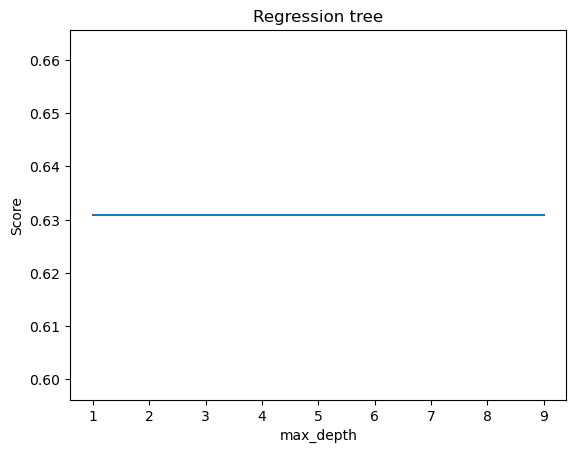

Mean cross-validation R^2 score:  0.6622010165297909
Test R^2 score:  0.6567838634592174
varriance =  4599958431.230274
variance > erreur False
Mean cross-validation R^2 score:  0.6610962541648057
Test R^2 score:  0.6578854922398654
varriance =  4585131320.582325
variance > erreur False
Mean cross-validation R^2 score:  0.6612871520996106
Test R^2 score:  0.6567838634592174
varriance =  4599958431.230274
variance > erreur False
Mean cross-validation R^2 score:  0.6613502984087098
Test R^2 score:  0.6567838634592174
varriance =  4599958431.230274
variance > erreur False
Mean cross-validation R^2 score:  0.6615331585476457
Test R^2 score:  0.6567838634592174
varriance =  4599958431.230274
variance > erreur False
Mean cross-validation R^2 score:  0.6613502984087098
Test R^2 score:  0.6567838634592174
varriance =  4599958431.230274
variance > erreur False
Mean cross-validation R^2 score:  0.6622335295148005
Test R^2 score:  0.6578854922398654
varriance =  4585131320.582325
variance > erreu

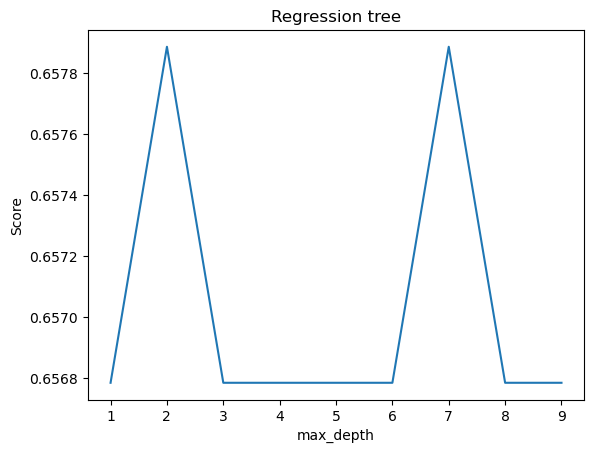

Mean cross-validation R^2 score:  0.6874485370061005
Test R^2 score:  0.6870564503953732
varriance =  4194016025.9210715
variance > erreur False
Mean cross-validation R^2 score:  0.6882392186180508
Test R^2 score:  0.6870564503953732
varriance =  4194016025.9210715
variance > erreur False
Mean cross-validation R^2 score:  0.6870697406670299
Test R^2 score:  0.6870564503953732
varriance =  4194016025.9210715
variance > erreur False
Mean cross-validation R^2 score:  0.6867959879473838
Test R^2 score:  0.6887637874716424
varriance =  4171256796.4422436
variance > erreur False
Mean cross-validation R^2 score:  0.686491923612129
Test R^2 score:  0.6887637874716424
varriance =  4171256796.4422436
variance > erreur False
Mean cross-validation R^2 score:  0.6869628813421034
Test R^2 score:  0.6887637874716424
varriance =  4171256796.4422436
variance > erreur False
Mean cross-validation R^2 score:  0.6880687095774971
Test R^2 score:  0.6870564503953732
varriance =  4194016025.9210715
variance >

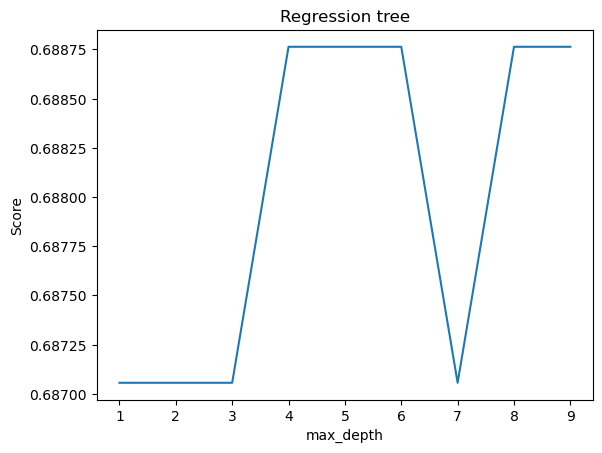

Mean cross-validation R^2 score:  0.6986453376340149
Test R^2 score:  0.7004400022765893
varriance =  4014903441.3956428
variance > erreur False
Mean cross-validation R^2 score:  0.6959976809868159
Test R^2 score:  0.703306486456561
varriance =  3976528742.4405117
variance > erreur False
Mean cross-validation R^2 score:  0.6981840976352643
Test R^2 score:  0.7027673199646871
varriance =  3983690993.7172565
variance > erreur False
Mean cross-validation R^2 score:  0.6968944982653625
Test R^2 score:  0.7056246443892107
varriance =  3945454593.0818686
variance > erreur False
Mean cross-validation R^2 score:  0.6995144749846107
Test R^2 score:  0.702758160209239
varriance =  3983827433.398583
variance > erreur False
Mean cross-validation R^2 score:  0.7002024747525025
Test R^2 score:  0.7056246443892107
varriance =  3945454593.0818686
variance > erreur False
Mean cross-validation R^2 score:  0.7005793419860314
Test R^2 score:  0.7060110465746807
varriance =  3940253499.7732854
variance > e

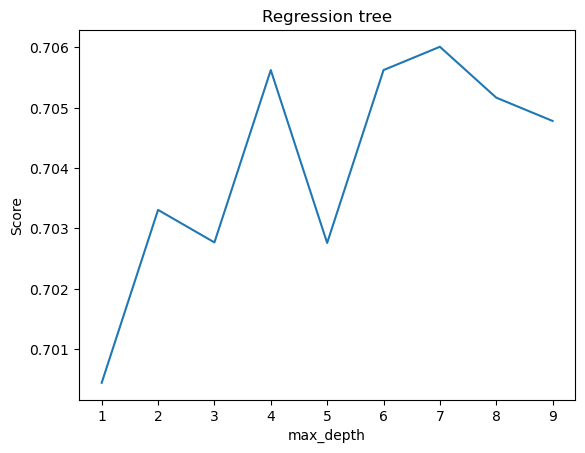

Mean cross-validation R^2 score:  0.7077688777042231
Test R^2 score:  0.7244743609658033
varriance =  3692821220.7946806
variance > erreur False
Mean cross-validation R^2 score:  0.7079665074716426
Test R^2 score:  0.7231686366621493
varriance =  3710312716.514629
variance > erreur False
Mean cross-validation R^2 score:  0.7083527434192762
Test R^2 score:  0.7217271057332131
varriance =  3729566930.17436
variance > erreur False
Mean cross-validation R^2 score:  0.709088282226346
Test R^2 score:  0.7252640063454441
varriance =  3682228440.06866
variance > erreur False
Mean cross-validation R^2 score:  0.7078667389367433
Test R^2 score:  0.7222561573164639
varriance =  3722477655.9577684
variance > erreur False
Mean cross-validation R^2 score:  0.7098035055544643
Test R^2 score:  0.7216804760034408
varriance =  3730218671.619756
variance > erreur False
Mean cross-validation R^2 score:  0.7099802540978215
Test R^2 score:  0.7257232015306398
varriance =  3676063521.305698
variance > erreur

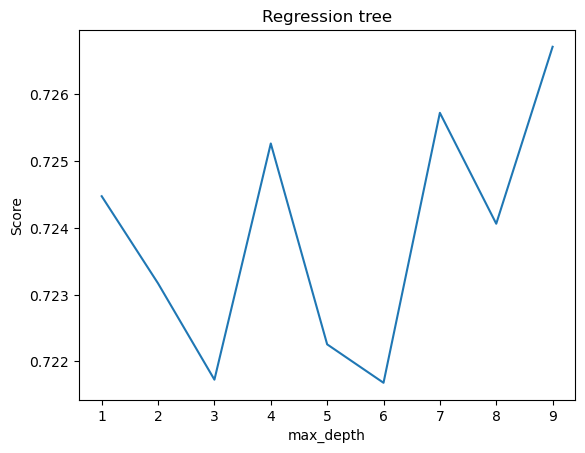

Mean cross-validation R^2 score:  0.713412464452946
Test R^2 score:  0.7296511199797284
varriance =  3623438278.8648396
variance > erreur False
Mean cross-validation R^2 score:  0.7143410579311688
Test R^2 score:  0.7318605114897776
varriance =  3593691944.993881
variance > erreur False
Mean cross-validation R^2 score:  0.7120747142961775
Test R^2 score:  0.7290179588361336
varriance =  3631956451.807696
variance > erreur False
Mean cross-validation R^2 score:  0.7100294344021684
Test R^2 score:  0.7325415337330491
varriance =  3584686129.0123234
variance > erreur False
Mean cross-validation R^2 score:  0.7155793859060873
Test R^2 score:  0.731727158250284
varriance =  3595519299.328801
variance > erreur False
Mean cross-validation R^2 score:  0.713989548917836
Test R^2 score:  0.7314061034122472
varriance =  3599819977.5667515
variance > erreur False
Mean cross-validation R^2 score:  0.7140035304272061
Test R^2 score:  0.7312122083235597
varriance =  3602474945.8136034
variance > erre

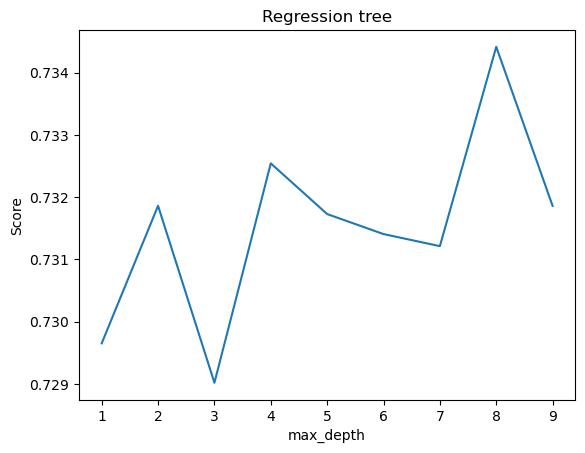

Best hyperparameters: 9 9
score est  0.7344136045766803


In [62]:

params = {
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 11)
}
score=0
max_depth0=0
min_samples_split0=0
score_values = []
for max_depth in params['max_depth']:
    for min_samples_split in params['min_samples_split']:
        reg_tree = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)
        evaluation3(reg_tree)
        score_values.append(reg_tree.score(X_test_scaled, y_test))
        if reg_tree.score(X_test_scaled, y_test)>score:
            score=reg_tree.score(X_test_scaled, y_test)
            max_depth0=max_depth
            min_samples_split0=min_samples_split
            
    plt.plot(params['max_depth'], score_values)
    plt.title("Regression tree")
    plt.xlabel("max_depth")
    plt.ylabel("Score")
    plt.show()
    n_values = []
    score_values = []
print('Best hyperparameters:', max_depth0,min_samples_split0)
print('score est ',score)
    


Mean cross-validation R^2 score:  0.7156457342536212
Test R^2 score:  0.7284146624136629
3640043152.0029464


,Prix_predits,median_house_value
0,161865.573770,112500.0
1,301068.367347,357000.0
2,188191.776316,165200.0
3,169450.934579,133500.0
4,223102.728883,280500.0
...,...,...
4032,123823.050847,139100.0
4033,282735.714286,500001.0
4034,413825.115385,500001.0
4035,144484.000000,100000.0


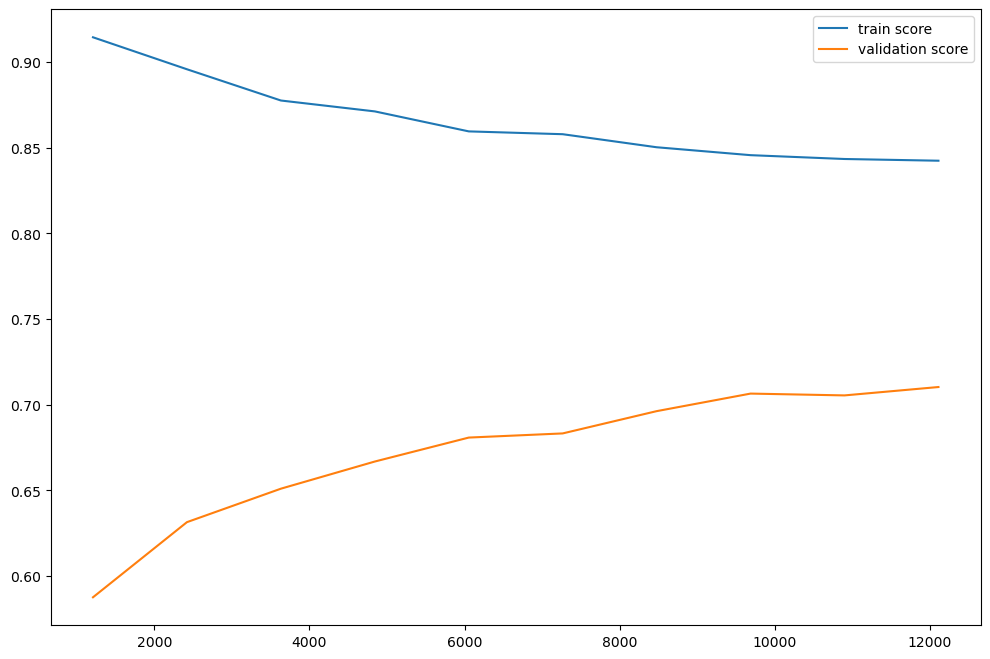

In [63]:
reg_tree = DecisionTreeRegressor(max_depth=10, min_samples_split=10)
b=evaluation4(reg_tree)
b

In [64]:
y_test

4974     112500.0
15991    357000.0
3673     165200.0
16346    133500.0
17577    280500.0
           ...   
14297    139100.0
11516    500001.0
17717    500001.0
4940     100000.0
8060     158200.0
Name: median_house_value, Length: 4037, dtype: float64

In [65]:
print(reg_tree.score(X_test_scaled, y_test))

0.7284146624136629


Mean cross-validation R^2 score:  0.3129390768498456
Test R^2 score:  0.2945084979454864
varriance =  9455552334.696142
variance > erreur False
Mean cross-validation R^2 score:  0.3129390768498456
Test R^2 score:  0.2945084979454864
varriance =  9455552334.696142
variance > erreur False
Mean cross-validation R^2 score:  0.3129390768498456
Test R^2 score:  0.2945084979454864
varriance =  9455552334.696142
variance > erreur False
Mean cross-validation R^2 score:  0.3129390768498456
Test R^2 score:  0.2945084979454864
varriance =  9455552334.696142
variance > erreur False
Mean cross-validation R^2 score:  0.3129390768498456
Test R^2 score:  0.2945084979454864
varriance =  9455552334.696142
variance > erreur False
Mean cross-validation R^2 score:  0.3129390768498456
Test R^2 score:  0.2945084979454864
varriance =  9455552334.696142
variance > erreur False
Mean cross-validation R^2 score:  0.3129390768498456
Test R^2 score:  0.2945084979454864
varriance =  9455552334.696142
variance > erreu

Mean cross-validation R^2 score:  0.6970272825883967
Test R^2 score:  0.7060110465746807
varriance =  3940253499.7732854
variance > erreur False
Mean cross-validation R^2 score:  0.7003368459964829
Test R^2 score:  0.7060110465746807
varriance =  3940253499.7732854
variance > erreur False
Mean cross-validation R^2 score:  0.6995710083887285
Test R^2 score:  0.7056246443892107
varriance =  3945454593.0818686
variance > erreur False
Mean cross-validation R^2 score:  0.6986831994222883
Test R^2 score:  0.7056246443892107
varriance =  3945454593.0818686
variance > erreur False
Mean cross-validation R^2 score:  0.6994408001561416
Test R^2 score:  0.70646157047938
varriance =  3934226472.168158
variance > erreur False
Mean cross-validation R^2 score:  0.6998099732227365
Test R^2 score:  0.70684797266485
varriance =  3929022960.6481442
variance > erreur False
Mean cross-validation R^2 score:  0.7069055782833005
Test R^2 score:  0.7208087277269665
varriance =  3741980442.7133603
variance > err

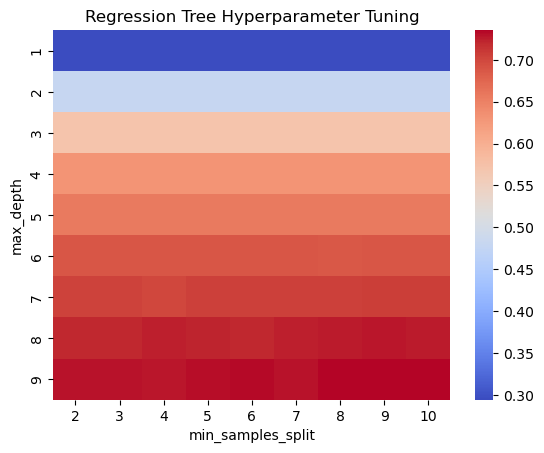

Best hyperparameters: 9 10
Score: 0.7354318977974885


In [66]:
params = {
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 11)
}

score_values = []
for max_depth in params['max_depth']:
    for min_samples_split in params['min_samples_split']:
        reg_tree = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)
        evaluation3(reg_tree)
        score_values.append(reg_tree.score(X_test_scaled, y_test))

score_array = np.array(score_values).reshape(len(params['max_depth']), len(params['min_samples_split']))
heatmap_data = pd.DataFrame(score_array, index=params['max_depth'], columns=params['min_samples_split'])
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title('Regression Tree Hyperparameter Tuning')
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.show()

best_params = np.unravel_index(score_array.argmax(), score_array.shape)
print('Best hyperparameters:', params['max_depth'][best_params[0]], params['min_samples_split'][best_params[1]])
print('Score:', score_array.max())


In [67]:
data = [max,score_array.max()]
index = ['KNeighborsRegressor', 'Decision Tree Regressor']
pd.DataFrame(data, index=index, columns=['Scores']).sort_values(ascending = False, by=['Scores'])


,Scores
KNeighborsRegressor,0.755722
Decision Tree Regressor,0.735432


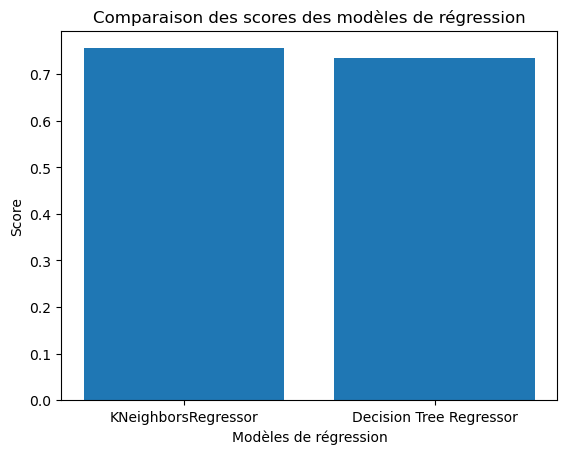

In [68]:
df = pd.DataFrame(data, index=index, columns=['Scores']).sort_values(ascending=False, by=['Scores'])

plt.bar(df.index, df['Scores'])
plt.xlabel('Modèles de régression')
plt.ylabel('Score')
plt.title('Comparaison des scores des modèles de régression')

plt.show()